In [1]:
import sys
path = "../../.."
if path not in sys.path:
    sys.path.insert(0, path)

In [ ]:
from tqdm import tqdm

import matplotlib.pyplot as plt
from data_retrieval import lipade_groundtruth
from data_retrieval.tools.uniformize_image import uniformize_image

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torchvision.models import resnet50, ResNet50_Weights
import torch.nn.functional as F
from torch.utils.data import DataLoader

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

optimizerFunc = optim.Adam
temperature = 1
learningRate = 1e-3
batch_size = 512
workers = 2
corpus = "lipade_groundtruth"
resultsPath = "../results/distance/" + corpus + "/"

/home/samuel-g/.pyenv/versions/3.11.11/lib/python3.11/site-packages/torch/cuda/__init__.py:129: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at /pytorch/c10/cuda/CUDAFunctions.cpp:109.)
  return torch._C._cuda_getDeviceCount() > 0


Dataset

In [8]:
x,_,y = lipade_groundtruth.getDataset(mode = 'all')

In [5]:
trainDataset = CIFAR10(root='./data', train=True, download=True, transform=initialTransform)
trainLoader = DataLoader(trainDataset, batch_size, shuffle=True, num_workers=workers)

Transformations

In [6]:
transform1 = transforms.Compose([
])
transform2 = transforms.Compose([
    transforms.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5, hue=0.1),
])

Representation

In [7]:
class SimCLR_Representation(nn.Module):
    def __init__(self, encoder, in_dim=2048, out_dim=128):
        super(SimCLR_Representation, self).__init__()
        self.encoder = encoder
        self.projection = nn.Sequential(
            nn.Linear(in_dim, 512),
            nn.ReLU(),
            nn.Linear(512, out_dim)
        )
    
    def forward(self, x_):
        h = self.encoder(x_)
        z = self.projection(h)
        return z

In [8]:
# ResNet50 - Stage 4
representationEncoder = resnet50(weights=ResNet50_Weights.DEFAULT)
representationEncoder.fc = nn.Identity()

Loss

In [9]:
def infoNCEloss(z1, z2, t=1):
    z = torch.cat([z1, z2], dim=0)

    s = F.cosine_similarity(z.unsqueeze(1), z.unsqueeze(0), dim=-1)
    exp_s = torch.exp(s / t)
    indicatorMask = torch.eye(s.shape[0], dtype=torch.bool, device=z.device) # True on diagonal, False elsewhere
    exp_s = exp_s.masked_fill(indicatorMask, 0)

    numerator = F.cosine_similarity(z1, z2, dim=-1)      # for z1
    numerator = torch.cat([numerator, numerator], dim=0) # for z2
    numerator = torch.exp(numerator / t)

    denominator = exp_s.sum(dim=1)

    l = -torch.log(numerator / denominator)
    return l.mean()

Train

In [10]:
model = SimCLR_Representation(representationEncoder).to(device)
optimizer = optimizerFunc(model.parameters(), lr=learningRate)

Epoch 0:   9%|▉         | 9/98 [00:00<00:02, 43.12it/s]

torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])


Epoch 0:  21%|██▏       | 21/98 [00:00<00:01, 52.12it/s]

torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])


Epoch 0:  34%|███▎      | 33/98 [00:00<00:01, 54.88it/s]

torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])


Epoch 0:  46%|████▌     | 45/98 [00:00<00:00, 56.30it/s]

torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])


Epoch 0:  58%|█████▊    | 57/98 [00:01<00:00, 56.40it/s]

torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])


Epoch 0:  70%|███████   | 69/98 [00:01<00:00, 56.32it/s]

torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])


Epoch 0:  83%|████████▎ | 81/98 [00:01<00:00, 56.39it/s]

torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])


Epoch 0:  95%|█████████▍| 93/98 [00:01<00:00, 55.21it/s]

torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])


Epoch 0: 100%|██████████| 98/98 [00:01<00:00, 54.28it/s]


torch.Size([512, 3, 32, 32])
torch.Size([336, 3, 32, 32])


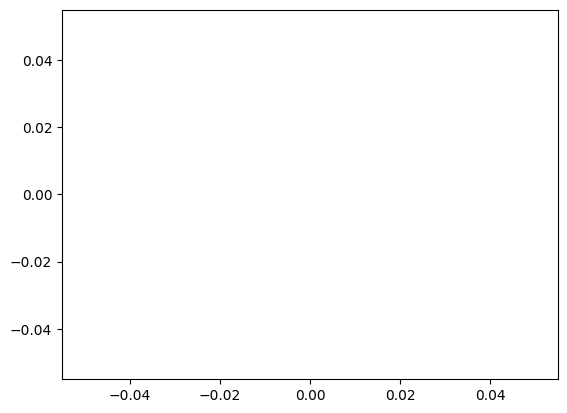

Epoch 1:   3%|▎         | 3/98 [00:00<00:03, 27.26it/s]

torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])


Epoch 1:   9%|▉         | 9/98 [00:00<00:02, 43.42it/s]

torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])


Epoch 1:  15%|█▌        | 15/98 [00:00<00:01, 48.13it/s]

torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])


Epoch 1:  21%|██▏       | 21/98 [00:00<00:01, 50.99it/s]

torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])


Epoch 1:  28%|██▊       | 27/98 [00:00<00:01, 52.69it/s]

torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])


Epoch 1:  34%|███▎      | 33/98 [00:00<00:01, 53.59it/s]

torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])


Epoch 1:  40%|███▉      | 39/98 [00:00<00:01, 54.13it/s]

torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])


Epoch 1:  46%|████▌     | 45/98 [00:00<00:00, 53.01it/s]

torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])


Epoch 1:  52%|█████▏    | 51/98 [00:00<00:00, 53.71it/s]

torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])


Epoch 1:  58%|█████▊    | 57/98 [00:01<00:00, 54.30it/s]

torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])


Epoch 1:  64%|██████▍   | 63/98 [00:01<00:00, 54.37it/s]

torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])


Epoch 1:  70%|███████   | 69/98 [00:01<00:00, 54.56it/s]

torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])


Epoch 1:  77%|███████▋  | 75/98 [00:01<00:00, 54.59it/s]

torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])


Epoch 1:  83%|████████▎ | 81/98 [00:01<00:00, 54.83it/s]

torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])


Epoch 1:  89%|████████▉ | 87/98 [00:01<00:00, 54.58it/s]

torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])


Epoch 1:  95%|█████████▍| 93/98 [00:01<00:00, 53.69it/s]

torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])


Epoch 1: 100%|██████████| 98/98 [00:01<00:00, 52.78it/s]

torch.Size([512, 3, 32, 32])
torch.Size([336, 3, 32, 32])


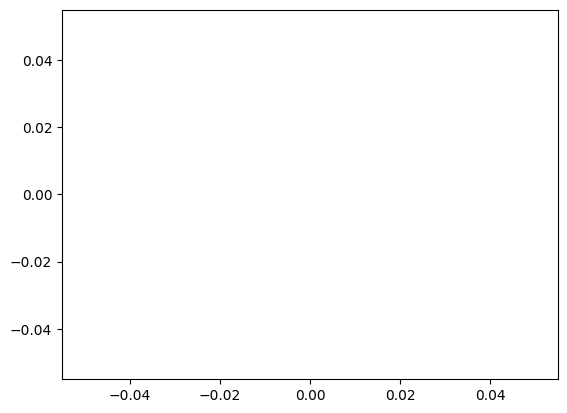

Epoch 2:   3%|▎         | 3/98 [00:00<00:03, 26.31it/s]

torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])


Epoch 2:   9%|▉         | 9/98 [00:00<00:02, 41.73it/s]

torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])


Epoch 2:  15%|█▌        | 15/98 [00:00<00:01, 47.09it/s]

torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])


Epoch 2:  21%|██▏       | 21/98 [00:00<00:01, 49.76it/s]

torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])


Epoch 2:  28%|██▊       | 27/98 [00:00<00:01, 51.13it/s]

torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])


Epoch 2:  34%|███▎      | 33/98 [00:00<00:01, 51.30it/s]

torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])


Epoch 2:  40%|███▉      | 39/98 [00:00<00:01, 52.50it/s]

torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])


Epoch 2:  46%|████▌     | 45/98 [00:00<00:00, 53.50it/s]

torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])


Epoch 2:  52%|█████▏    | 51/98 [00:01<00:00, 53.95it/s]

torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])


Epoch 2:  58%|█████▊    | 57/98 [00:01<00:00, 54.64it/s]

torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])


Epoch 2:  64%|██████▍   | 63/98 [00:01<00:00, 55.25it/s]

torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])


Epoch 2:  70%|███████   | 69/98 [00:01<00:00, 55.33it/s]

torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])


Epoch 2:  77%|███████▋  | 75/98 [00:01<00:00, 54.87it/s]

torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])


Epoch 2:  83%|████████▎ | 81/98 [00:01<00:00, 53.48it/s]

torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])


Epoch 2:  89%|████████▉ | 87/98 [00:01<00:00, 53.87it/s]

torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])


Epoch 2:  95%|█████████▍| 93/98 [00:01<00:00, 54.18it/s]

torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])


Epoch 2: 100%|██████████| 98/98 [00:01<00:00, 52.48it/s]

torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([336, 3, 32, 32])


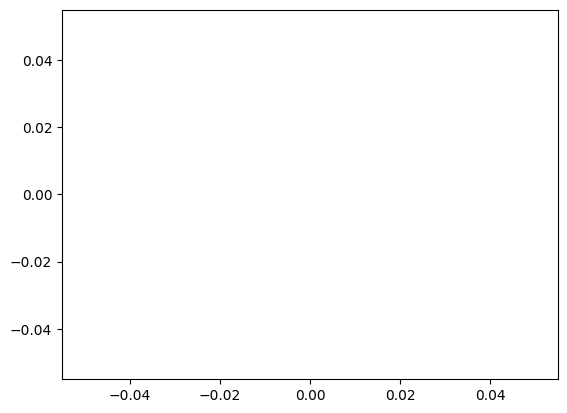

Epoch 3:   0%|          | 0/98 [00:00<?, ?it/s]

torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])


Epoch 3:   9%|▉         | 9/98 [00:00<00:02, 43.63it/s]

torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])


Epoch 3:  21%|██▏       | 21/98 [00:00<00:01, 51.12it/s]

torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])


Epoch 3:  34%|███▎      | 33/98 [00:00<00:01, 52.56it/s]

torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])


Epoch 3:  46%|████▌     | 45/98 [00:00<00:00, 53.75it/s]

torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])


Epoch 3:  58%|█████▊    | 57/98 [00:01<00:00, 53.32it/s]

torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])


Epoch 3:  70%|███████   | 69/98 [00:01<00:00, 53.65it/s]

torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])


Epoch 3:  83%|████████▎ | 81/98 [00:01<00:00, 54.21it/s]

torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])


Epoch 3:  95%|█████████▍| 93/98 [00:01<00:00, 54.93it/s]

torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])


Epoch 3: 100%|██████████| 98/98 [00:01<00:00, 52.92it/s]

torch.Size([512, 3, 32, 32])
torch.Size([336, 3, 32, 32])


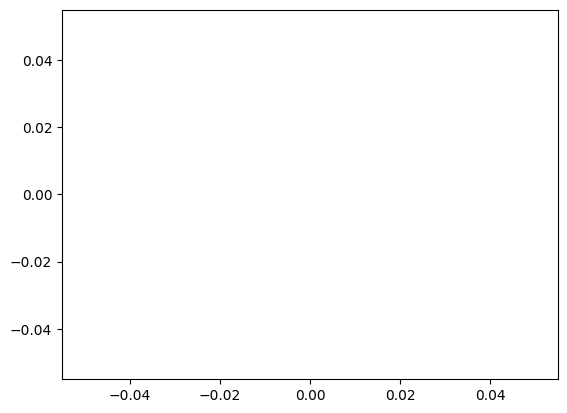

Epoch 4:   3%|▎         | 3/98 [00:00<00:03, 24.50it/s]

torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])


Epoch 4:   9%|▉         | 9/98 [00:00<00:02, 41.98it/s]

torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])


Epoch 4:  15%|█▌        | 15/98 [00:00<00:01, 47.51it/s]

torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])


Epoch 4:  21%|██▏       | 21/98 [00:00<00:01, 50.87it/s]

torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])


Epoch 4:  28%|██▊       | 27/98 [00:00<00:01, 52.33it/s]

torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])


Epoch 4:  34%|███▎      | 33/98 [00:00<00:01, 53.03it/s]

torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])


Epoch 4:  40%|███▉      | 39/98 [00:00<00:01, 52.88it/s]

torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])


Epoch 4:  46%|████▌     | 45/98 [00:00<00:00, 53.39it/s]

torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])


Epoch 4:  52%|█████▏    | 51/98 [00:01<00:00, 52.64it/s]

torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])


Epoch 4:  58%|█████▊    | 57/98 [00:01<00:00, 53.36it/s]

torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])


Epoch 4:  64%|██████▍   | 63/98 [00:01<00:00, 53.65it/s]

torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])


Epoch 4:  70%|███████   | 69/98 [00:01<00:00, 54.14it/s]

torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])


Epoch 4:  77%|███████▋  | 75/98 [00:01<00:00, 54.27it/s]

torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])


Epoch 4:  83%|████████▎ | 81/98 [00:01<00:00, 54.17it/s]

torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])


Epoch 4:  89%|████████▉ | 87/98 [00:01<00:00, 54.00it/s]

torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])


Epoch 4:  95%|█████████▍| 93/98 [00:01<00:00, 54.56it/s]

torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])


Epoch 4: 100%|██████████| 98/98 [00:01<00:00, 52.29it/s]

torch.Size([512, 3, 32, 32])
torch.Size([336, 3, 32, 32])


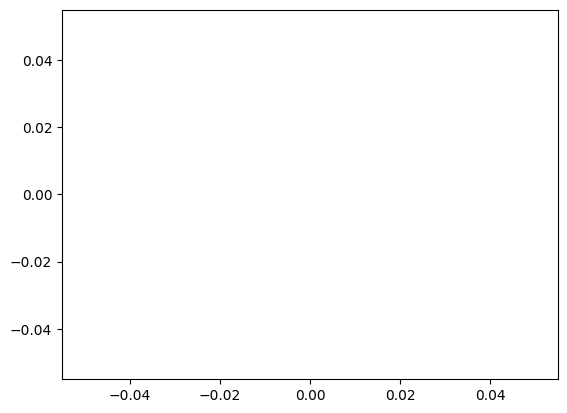

In [ ]:
model.train()

epochs = 5
losses = []
for epoch in range(epochs):
    for sampledMinibatch in tqdm(trainLoader, desc="Epoch " + str(epoch)):
        x = sampledMinibatch[0].to(device)
        # Transformation
        x_1, x_2 = transform1(x), transform2(x)
        # Representation
        z1 = model(x_1)
        z2 = model(x_2)
        # Loss
        loss = infoNCEloss(z1, z2, temperature)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
    plt.plot(losses)
    plt.show()

Test

In [ ]:
losses

[5.941947937011719,
 5.94412088394165,
 5.945856094360352,
 5.954378128051758,
 5.943048477172852,
 5.944109916687012,
 5.946844100952148,
 5.946574687957764,
 5.945708274841309,
 5.942929744720459,
 5.948882579803467,
 5.947646141052246,
 5.945780277252197,
 5.949907302856445,
 5.944788932800293,
 5.944826126098633,
 5.941889762878418,
 5.952572822570801,
 5.946628570556641,
 5.943717956542969,
 5.957860946655273,
 5.945837497711182,
 5.946152687072754,
 5.948400497436523,
 5.953217506408691,
 5.9407219886779785,
 5.953330993652344,
 5.941036701202393,
 5.9466447830200195,
 5.946623802185059,
 5.946612358093262,
 5.943546295166016,
 5.9442033767700195,
 5.946232318878174,
 5.942020416259766,
 5.945552825927734,
 5.94115686416626,
 5.946771144866943,
 5.946566104888916,
 5.9484477043151855,
 5.9493818283081055,
 5.947885513305664,
 5.943382263183594,
 5.941274642944336,
 5.946207046508789,
 5.943130970001221,
 5.946714401245117,
 5.94405460357666,
 5.943413734436035,
 5.940815925598144